## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)



### DOĞUKAN AYTEKİN 2200356003

## 1. Energy Efficiency Estimation (60 points)

### 1.1. Introduction
* Brief overview of the regression task.
* Description of the dataset used for regression analysis.



### Introduction answers 
* In regression task trying to predicting a continuous output variable based on features. The objective is to understand the relationship between the input variables and the output variables.
* This dataset is used to predict building heating and cooling loads based on these features when designing a building or evaluating its energy efficiency. 

* Features : Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
* Dependent variables : Heating Load , Cooling Load 

### 1.2. Data Loading and Exploration (5 points)

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 


from scipy.stats import chi2_contingency

In [2]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
df = pd.read_csv("energy_efficiency_data.csv")
data_matrix = df.values
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
shape = df.shape
print(df.columns)
print(df.describe())
# not any NaN values
df.info()


Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')
       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   


### 1.3. Data Preprocessing (10 points)
* Explain the preprocessing steps taken and their rationale.

I apply chi square and correlation feature selection methods and for feature scaling standardization and normalization techniques are used.

I will explain the rationale between my choice of methods in comparing table of feature scaling and feature selection methods.

In [4]:
## Apply feature selection methods to see if it has a contribution on performance. (ablation study)
## Implement functions for different feature scaling techniques to see their effects on the performance. (ablation study)
## Explain the rationale your choice of methods.

# using chi square method as feature selection method. Lower than 3000 not selected 

print('Heating Load chi2 scores')
for column in df.columns.tolist():
    cross_tab = pd.crosstab(df['Heating_Load'], df[column])
    chi2, p_value, _, _ = chi2_contingency(cross_tab)
    print(column , " " , chi2)

df_heat_chi = df.drop(['Roof_Area' , 'Overall_Height' , 'Glazing_Area' ,'Orientation' , 'Cooling_Load'] , axis = 1)

df_heat_chi = df_heat_chi.drop_duplicates()
df_heat_chi_matrix = df_heat_chi.values

print("--------------------")

print('Cooling Load chi2 scores')
for column in df.columns.tolist():
    cross_tab = pd.crosstab(df['Cooling_Load'], df[column])
    chi2, p_value, _, _ = chi2_contingency(cross_tab)
    print(column , " " , chi2)

df_cool_chi = df.drop(['Roof_Area' , 'Overall_Height' , 'Glazing_Area' ,'Orientation' , 'Heating_Load'] , axis = 1)

df_cool_chi = df_cool_chi.drop_duplicates()
df_cool_chi_matrix = df_cool_chi.values


print("--------------------")


# Using corelation as feature selection methods lower than 0.3 not selected

print(df.corr()['Heating_Load'])

# preparing dataFrame for heating_Load prediction
Heating = df['Heating_Load']
df_heat_correlation = df.drop(['Orientation' , 'Glazing_Area' , 'Glazing_Area_Distribution' , 'Heating_Load' , 'Cooling_Load'] , axis = 1)
df_heat_correlation['Heating'] = Heating


# remove duplicates
df_heat_correlation = df_heat_correlation.drop_duplicates()

#create np matrix
df_heat_correlation['Overall_Height']
df_heat_correlation_matrix = df_heat_correlation.values

# same steps applied for cooling load predict
print(df.corr()['Cooling_Load'])

df_cool_correlation = df.drop(['Orientation' , 'Glazing_Area' , 'Glazing_Area_Distribution' , 'Heating_Load'] , axis = 1)

df_cool_correlation = df_cool_correlation.drop_duplicates()
df_cool_correlation_matrix = df_cool_correlation.values

# Feature scaling methods pass column by column
def normalize(matrix):
    min_vals = np.min(matrix, axis=0)
    max_vals = np.max(matrix, axis=0)
    normalized_matrix = (matrix - min_vals) / (max_vals - min_vals)
    return normalized_matrix

def standardize(matrix):
    mean_vals = np.mean(matrix, axis=0)
    std_vals = np.std(matrix, axis=0)
    standardized_matrix = (matrix - mean_vals) / std_vals
    return standardized_matrix

Heating Load chi2 scores
Relative_Compactness   7439.199999999999
Surface_Area   7439.199999999999
Wall_Area   3998.133333333333
Roof_Area   2168.833333333333
Overall_Height   768.0
Orientation   1765.8666666666668
Glazing_Area   2098.453333333333
Glazing_Area_Distribution   3108.977777777778
Heating_Load   449280.00000000006
Cooling_Load   381368.53333333344
--------------------
Cooling Load chi2 scores
Relative_Compactness   7462.0
Surface_Area   7462.0
Wall_Area   4002.0
Roof_Area   2136.3333333333335
Overall_Height   768.0
Orientation   1928.0
Glazing_Area   2176.0
Glazing_Area_Distribution   3277.333333333334
Heating_Load   381368.53333333344
Cooling_Load   487679.99999999994
--------------------
Relative_Compactness         0.622272
Surface_Area                -0.658120
Wall_Area                    0.455671
Roof_Area                   -0.861828
Overall_Height               0.889431
Orientation                 -0.002587
Glazing_Area                 0.269841
Glazing_Area_Distributi

### Important Implementation Detail 
* Teacher you can change the working_matrix variable with one of this matrices (df_heat_correlation_matrix , df_heat_chi_matrix , df_cool_correlation_matrix , df_cool_chi_matrix ) to see the performance of that type of prediction. 

* Before the result and analysis part I create a table to compare all of the predictions performances.

In [5]:
working_matrix = df_heat_correlation_matrix

* We can see the results of chi square and correlation tests. We analized and select the features with the spesific thresholds about that values at the previouse code section


In [6]:
## Handle missing values (if any).
# no missing values

## Split the dataset into training and testing sets.
## Set the training set to be 80% and the test set to be 20% of the dataset.


def SplitAndReshape(matrix,scaleNumber):

    # we are giving scaleNumber to choose the feature scaling method (-1 -> no scaling) , (0 -> normalizing) , (1 -> standardizing)

    colMinusOne = matrix.shape[1]-1
    if(scaleNumber!=-1):
        for i in range(colMinusOne):
            if (scaleNumber==0):
                matrix[:,i]= normalize(matrix[:,i])
            else:
                matrix[:,i]= standardize(matrix[:,i])

    number_of_rows = matrix.shape[0]
    number_of_columns = matrix.shape[1]

    # spliting the test and train data

    train_size = int(4*(number_of_rows/5))
    test_size = number_of_rows-train_size

    train_data = matrix[:train_size]
    x_train , y_train = train_data[:,:colMinusOne] , train_data[:,colMinusOne]

    test_data = matrix[train_size:]
    x_test , y_test = test_data[:,:colMinusOne] , test_data[:,colMinusOne]

    # stack feature matrixes first column with all ones to multiply with bias
    x_train = np.vstack((np.ones((x_train.shape[0],)), x_train.T)).T
    x_test = np.vstack((np.ones((x_test.shape[0],)), x_test.T)).T

    y_train = np.reshape(y_train,(y_train.size,1))
    y_test = np.reshape(y_test,(y_test.size,1))

    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test = SplitAndReshape(working_matrix,1)


* In this previous section we first scale our feature values and reshape the y values to apply our model properly

## Explain the rationale behind the chosen split ratio.
Splitting the training and test datasets into 80-20 ratio provides model to learns effiecently from training data and having enough data to objectively evaluate its generalization ability.

### 1.4. Linear Regression Model (15 points)
* Explain the reason behind the application of linear regression on this type of data.

In [7]:
## Implement linear regression model from scratch, using libraries like NumPy.
def model (X,Y, learning_rate , iteration , x_mse, y_mse):
    mse_list = []
    weights = np.zeros((X.shape[1],1))

    for i in range(iteration):
        x_train_transpose = X.T
        y_pred = np.dot(X,weights)

        # formula of differential of the error function
        diff_of_error = (1/Y.size) * np.dot(x_train_transpose, y_pred - Y)

        # update weights
        weights = weights - (learning_rate * diff_of_error)


        # creating list of MSE's to plot the curve
        if(i%10 == 0):
            y_pred = np.dot(x_mse, weights)
            mse_test = np.mean(np.square(y_mse - y_pred))
            mse_list.append(mse_test)

    return mse_list , weights

In [8]:
def TrainTestAndCompare(iteration, learning_rate):
    ## Train the model using the training dataset.

    mse_list , weights = model(x_train,y_train,learning_rate,iteration, x_train, y_train)

    ## Evaluate the model's performance on the training set by computing MSE.
    y_pred = np.dot(x_train, weights)
    average_fault_value = np.mean(np.abs(y_train-y_pred))
    mse_train = np.mean(np.square(y_train - y_pred))
    average_truth_value = np.mean(y_train)
    
    return mse_list , weights , average_fault_value , average_truth_value , mse_train

### Now let's try different iterations and learning rate values to try to find the minimum MSE and for compare I will create a Table.

In [9]:
iteration_list = [500,1000,2000,5000]
learning_rate_list = [0.0001,0.001,0.01]
myTable_1 = PrettyTable(["Number of Iterations", "Learning Rate","Average Fault Value", "Average Truth Value" ,"MSE"])

for iteration in iteration_list:
    for learning_rate in learning_rate_list:
        mse_list , weights , fault , truth , MSE_ = TrainTestAndCompare(iteration,learning_rate)
        myTable_1.add_row([iteration, learning_rate, fault , truth , MSE_])

print(myTable_1)

+----------------------+---------------+---------------------+---------------------+--------------------+
| Number of Iterations | Learning Rate | Average Fault Value | Average Truth Value |        MSE         |
+----------------------+---------------+---------------------+---------------------+--------------------+
|         500          |     0.0001    |  21.269890047445234 |  22.382438095238097 | 529.6290364902566  |
|         500          |     0.001     |  13.515067088409523 |  22.382438095238097 | 208.0976125303798  |
|         500          |      0.01     |  3.1333180421051847 |  22.382438095238097 | 17.850332664085528 |
|         1000         |     0.0001    |  20.21564534386332  |  22.382438095238097 | 470.43548462664137 |
|         1000         |     0.001     |  8.308296403751546  |  22.382438095238097 | 87.82980839664773  |
|         1000         |      0.01     |  3.0821400507850405 |  22.382438095238097 | 17.076002938400563 |
|         2000         |     0.0001    |  18.2

* As we can see from table the minimum MSE comes when we pick number of iterations 5000 and learning rate 0.1 

### Let's create a table to compare the model performance between different iteration and learning rate values

### 1.5 Model Evaluation on Test Set (15 points)

In [10]:
## Make predictions on the test set using the trained model.
## Calculate Mean Squared Error (MSE) for the test set.
## Comment on the scores.

# calculating MSE for test set
y_pred = np.dot(x_test, weights)
print("Average fault value:" , np.mean(np.abs(y_test-y_pred)))
print("Average truth value" ,np.mean(y_test))
mse_test = np.mean(np.square(y_test - y_pred))
print("MSE value in test data : " ,mse_test)


Average fault value: 3.8517553416590578
Average truth value 25.707348484848485
MSE value in test data :  21.401039242804003


If we look at the scores of both test and train data test MSE is slight bigger than train data as expected

In [11]:
## Create a table to present the test MSEs for different feature scaling and selection methods.

# calculating MSE 's for different feature scaling and selection methods in same iteration and learning rate values. 

iteration = 5000
learning_rate = 0.01
mse_scores_list = []

def calculateMse(df_matrix,scaling_score,weights):
    x_train,y_train,x_test,y_test = SplitAndReshape(df_matrix,scaling_score)
    mse_list , weights = model(x_train,y_train,learning_rate,iteration, x_train, y_train)
    y_pred = np.dot(x_test, weights)
    mse = np.mean(np.square(y_test - y_pred))
    return mse

mse_scores_list.append(calculateMse(df_heat_correlation_matrix,0,weights)) # normalized
mse_scores_list.append(calculateMse(df_heat_correlation_matrix,1,weights)) # standardized
mse_scores_list.append(calculateMse(df_heat_chi_matrix,0,weights)) # normalized
mse_scores_list.append(calculateMse(df_heat_chi_matrix,1,weights)) # standardized

mse_scores_list.append(calculateMse(df_cool_correlation_matrix,0,weights)) # normalized
mse_scores_list.append(calculateMse(df_cool_correlation_matrix,1,weights)) # standardized
mse_scores_list.append(calculateMse(df_cool_chi_matrix,0,weights)) # normalized
mse_scores_list.append(calculateMse(df_cool_chi_matrix,1,weights)) # standardized

myTable = PrettyTable(["Predicted Feature", "Feature Scaling Method","Feature Selection Method" ,"MSE"])
myTable.add_row(["Heating_Load", "Normalization","Correlation" ,mse_scores_list[0]]) 
myTable.add_row(["Heating_Load", "Standardization", "Correlation",mse_scores_list[1]]) 

myTable.add_row(["Heating_Load", "Normalization","Chi Square" ,mse_scores_list[2]]) 
myTable.add_row(["Heating_Load", "Standardization", "Chi Square",mse_scores_list[3]]) 

myTable.add_row(["Cooling_Load", "Normalization","Correlation"  ,mse_scores_list[4]]) 
myTable.add_row(["Cooling_Load", "Standardization","Correlation"  ,mse_scores_list[5]]) 

myTable.add_row(["Cooling_Load", "Normalization","Chi Square" ,mse_scores_list[6]]) 
myTable.add_row(["Cooling_Load", "Standardization","Chi Square" ,mse_scores_list[7]]) 

print(myTable)



+-------------------+------------------------+--------------------------+--------------------+
| Predicted Feature | Feature Scaling Method | Feature Selection Method |        MSE         |
+-------------------+------------------------+--------------------------+--------------------+
|    Heating_Load   |     Normalization      |       Correlation        | 21.741841930780325 |
|    Heating_Load   |    Standardization     |       Correlation        | 21.401039242804014 |
|    Heating_Load   |     Normalization      |        Chi Square        | 25.42130687038043  |
|    Heating_Load   |    Standardization     |        Chi Square        | 21.696548112142754 |
|    Cooling_Load   |     Normalization      |       Correlation        | 16.144294311766373 |
|    Cooling_Load   |    Standardization     |       Correlation        | 15.717026981317701 |
|    Cooling_Load   |     Normalization      |        Chi Square        | 22.930897740032147 |
|    Cooling_Load   |    Standardization     |    

* As we can see on table in both predicted features , best methods are Standardization and Correlation.

### 1.6 Results Analysis and Conclusion (15 points)

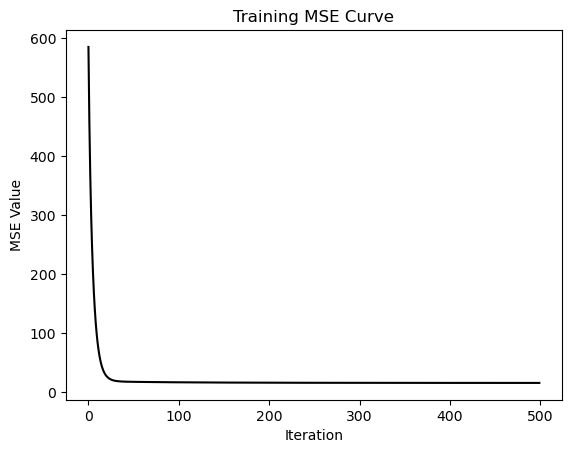

In [12]:
## Plot training MSEs to visualize the learning curve.

index_list = []
for i in range(len(mse_list)):
    index_list.append(i)

plt.title("Training MSE Curve")
plt.xlabel('Iteration')
plt.ylabel('MSE Value')
plt.plot(index_list,mse_list, color="black")
plt.show()



* If we look at the curve our MSE value is decreasing continously so we can say that our model is working appropiately.

## Interpret the results of the ablation study on feature scaling and selection.

Applying feature scaling technique reduces the numerical differences between the values of our features, leading to more accurate results from the model.

## Summarize key findings from the regression analysis.

* In this regression analysis task first we analyze our data then we calculate the chi square and correlation values to select the features and scale them with standardization and normalization techniques . Then we coded our model from scratch. Lastly we train our model with data matrixes which created with different feature scaling and feature selection methods and test them.

* If we look at the scores in test set averagely our predicted value is 22.3 and the fault is 3.0 I think this is an acceptable result for this model. 

* Also if we talk about the feature selection and scaling methods . We can easily see that correlation for feature selection and standardization for feature scaling works better for this dataset.

## 2. Personality Type Classification (40 points)

### 2.1. Introduction
* Brief overview of the classification task.
* Description of the dataset used for classification analysis.

* In classifiaction task our aim is to label the data points correctly

* In our classification dataset we have some question answers and with that answers we are trying to guess the personality type of the person.

### 2.2. Data Loading and Exploration (5 points)

In [13]:
## Import necessary libraries
import numpy as np
import pandas as pd

In [14]:
## Read the classification data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
df_personality = pd.read_csv("subset_16P.csv")


In [15]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

shape = df_personality.shape
print(df_personality.columns)
print(df_personality.describe())
df_personality.info()

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

### 2.3. Data Preprocessing (5 points)
* Explain the preprocessing steps taken and their rationale.

* In preprocessing first I drop the ID columns because it has no effect on the result and then I label the personality types with sequential numbers to work on data properly.

In [16]:
## Perform any necessary data transformations or feature engineering.

# normalize  into (-1,1) range
def min_max_normalization(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized_arr = 2 * ((arr - min_val) / (max_val - min_val)) - 1
    return normalized_arr

unique_values = df_personality.iloc[:, -1].unique()
df_personality['Personality'] = df_personality['Personality'].astype('category').cat.codes

df_personality = df_personality.drop(['Response Id'] , axis = 1)

In [17]:
#cheking number of different class

pers_matrix = df_personality.values

row_number, column_number = pers_matrix.shape[0] , pers_matrix.shape[1]
class_number = np.unique(pers_matrix[:,-1]).size

* Data is splitted and column with all ones will be appended.

In [18]:
## Handle missing values (if any).
## Split the dataset into training and testing sets. (80% train, 20% test)


# spliting data to train and test data 
trainsize = int(4*(row_number/5))
testsize = row_number-trainsize

x_train = pers_matrix[:trainsize, : -1]
y_train = pers_matrix[:trainsize, -1 ]

x_test = pers_matrix[trainsize:, :-1 ]
y_test = pers_matrix[trainsize: , -1 ]

# making first column all ones in features matrix to multiply with bias
bias_column = np.ones((x_train.shape[0],1))
x_train = np.hstack((bias_column,x_train))

bias_column = np.ones((x_test.shape[0],1))
x_test = np.hstack((bias_column,x_test))


### 2.4. Implementing and Evaluating Perceptron for Linear Classification (10 points)
* Explain the reason behind the application of perceptron learning algorithm on this type of data.

* Perceptron is faster compared to other more complex algorithms. It can be trained quickly, especially on large datasets like this one, which consists of 10 thousand rows. Therefore, using such an algorithm makes perfect sense.


In [19]:
## Implement the Perceptron learning algorithm from scratch.

def PerceptronLearning(matrix, labels , L , iteration):
    
    ## creating a weight matrix to make dot product and find highest score with all columns
    weight_matrix = np.zeros((class_number,matrix.shape[1]))
    

    for iterate in range(iteration): 
        for row in range(matrix.shape[0]):
            # trying to find the highest score

            score = 0
            predicted_class = 0
            true_class = labels[row]
            for w_row in range(weight_matrix.shape[0]):
                row_score = np.sum(np.multiply(matrix[row],weight_matrix[w_row]))
                if(row_score>score):
                    score = row_score
                    predicted_class = w_row
            
            # update rule for perceptron algorithm
            if predicted_class != true_class:
                weight_matrix[true_class] += L * matrix[row]
                weight_matrix[predicted_class] -= L * matrix[row]
    
    return weight_matrix
            

def predict(matrix , weights , tried_row):
    # making predictions with using weight matrix already created
    
    max_score = 0
    predicted_class = 0
    for w_row in range(weights.shape[0]):
        row_score = np.sum(np.multiply(matrix[tried_row],weights[w_row]))
        if(row_score > max_score):
            max_score=row_score
            predicted_class = w_row

    return predicted_class


In [20]:
## Train the Perceptron model on the training set.

trained_weights = PerceptronLearning(x_train,y_train,0.0001,50)

correct = 0
incorrect = 0

# calculating the correct and incorrect answers of the model to find accuracy
for tried_value in range(x_train.shape[0]):
    if(predict(x_train,trained_weights,tried_value) == y_train[tried_value]):
        correct += 1
    else :
        incorrect += 1
training_accuracy = correct / (correct+incorrect)
print("Training accuracy : " , training_accuracy)

Training accuracy :  0.886125


In [21]:
## Evaluate the model's performance on the test set by calculating accuracy. Comment on the score.

correct = 0
incorrect = 0

# calculating the correct and incorrect answers of the model to find accuracy

for tried_value in range(x_test.shape[0]):
    if(predict(x_test,trained_weights,tried_value) == y_test[tried_value]):
        correct += 1
    else :
        incorrect += 1
test_accuracy = correct / (correct+incorrect)
print("Test accuracy : " , test_accuracy)

Test accuracy :  0.8565


* Training accuray is 0.88 , test accuracy is 0.85. There is no overfitting or underfitting in data the decreasing value in accuracy is acceptable.

### 2.5 Evaluating SVM for Linear Classification (5 points)

In [22]:
## Import SVM model from scikit-learn.
from sklearn import svm

In [23]:
## Train the SVM model on the training set.

svm_model = svm.SVC(gamma = 'auto')
svm_model.fit(x_train,y_train)

train_accuracy_svm = svm_model.score(x_train,y_train)
print("Trainin accuracy : " , train_accuracy_svm)


Trainin accuracy :  0.991125


In [24]:
## Evaluate the model's performance on the test set by calculating accuracy. Comment on the score.

predictions = svm_model.predict(x_test)
test_accuracy_svm = np.mean(predictions == y_test)
print("Test accuracy:", test_accuracy_svm)


Test accuracy: 0.984


* We can take really fast results and really good accuracy in built-in SVM. Built-in SVM method is too much optimized compared to my Perceptron model.

### 2.6 Results Analysis and Conclusion (15 points)

In [25]:
## Compare the performance of Perceptron and SVM models in terms of accuracy.
## Discuss the strengths and limitations of each model.
## Summarize key findings from the classification analysis.

*  In accuracy scores Perceptron gives 0.85 accuracy SVM gives 0.98 in test set so for this dataset choosing SVM can be more logical if accuracy is the first priority.

* Generaly Perceptron Model is faster than SVM Model but because of this is my implementation from scratch and it is not optimized too much Perceptron is running slower. Also in terms of advantages of SVM , SVM can work on non-linear classification problems which Perceptron can't. 

* For this dataset our key finding must be SVM is working with more accuracy than Perceptron model.










### Thank you for reading my code and report. I hope you like my Assignment.